In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%time df=pd.read_csv('US_Accidents_June.csv')

CPU times: user 16.6 s, sys: 2.28 s, total: 18.9 s
Wall time: 19.6 s


In [3]:
df.shape

(3513617, 49)

In [4]:
(df.isna().sum()!=0).value_counts()

False    26
True     23
dtype: int64

In [5]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

### Analysing missing values using heatmap

In [6]:
#%time sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='crest')

### Visualisation of Data

<AxesSubplot:xlabel='Severity', ylabel='count'>

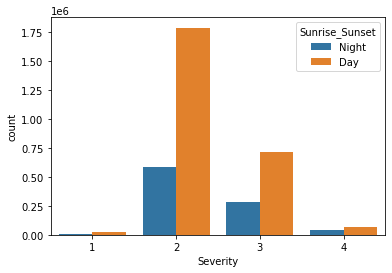

In [7]:
sns.countplot(x='Severity',hue='Sunrise_Sunset',data=df)

(array([1236961.,  342057.,  369725.,  191469.,  177041.,  538314.,
         365310.,  268448.,   17644.,    6648.]),
 array([ 0. ,  4.8,  9.6, 14.4, 19.2, 24. , 28.8, 33.6, 38.4, 43.2, 48. ]),
 <BarContainer object of 10 artists>)

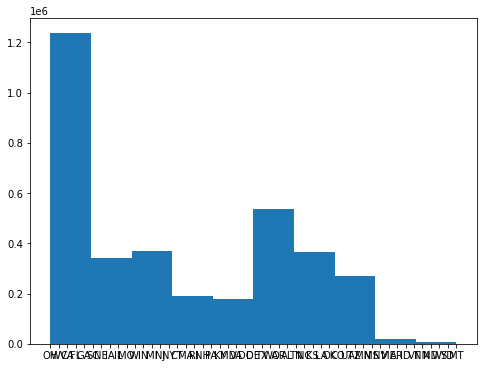

In [8]:
plt.figure(figsize=(8,6))
plt.hist(df.State,bins=10)

### Dropping Unnecessary Data

Civil_Twilight, Nautical_Twilight, Astronomical_Twilight are same as Sunrise_Sunset datavalue so no use in model,
End_Lat and End_Lng having 70% missing values so dropping those columns would be better option

In [9]:
new_df=df.drop(['ID','Source','Start_Time','End_Time','Number','Country','Civil_Twilight','Weather_Timestamp',
       'Nautical_Twilight', 'Astronomical_Twilight','Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng','Turning_Loop','Description','Street','Street','County','City','Zipcode','Timezone','Airport_Code'],axis=1)

In [10]:
columns=new_df.columns

In [11]:
columns

Index(['TMC', 'Severity', 'Distance(mi)', 'Side', 'State', 'Temperature(F)',
       'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset'],
      dtype='object')

In [12]:
new_df.isnull().sum()

TMC                  1034799
Severity                   0
Distance(mi)               0
Side                       0
State                      0
Temperature(F)         65732
Wind_Chill(F)        1868249
Humidity(%)            69687
Pressure(in)           55882
Visibility(mi)         75856
Wind_Direction         58874
Wind_Speed(mph)       454609
Precipitation(in)    2025874
Weather_Condition      76138
Amenity                    0
Bump                       0
Crossing                   0
Give_Way                   0
Junction                   0
No_Exit                    0
Railway                    0
Roundabout                 0
Station                    0
Stop                       0
Traffic_Calming            0
Traffic_Signal             0
Sunrise_Sunset           115
dtype: int64

Weather_Timestamp and Weather_Condition can't be interpolate so better to eliminate rows having missing values

In [13]:
#new_df=new_df[~new_df.Weather_Timestamp.isnull()]
new_df=new_df[~new_df.Weather_Condition.isnull()]

In [14]:
new_df.columns.shape

(27,)

In [15]:
#Side having one missing value which was eliminated
index_drop=new_df[new_df['Side']==' '].index
new_df.drop(index_drop,inplace=True)

In [41]:
new = new_df.interpolate()

In [42]:
new = new.fillna(method='bfill')

In [18]:
#sns.heatmap(new.isnull(),yticklabels=False,cbar=False,cmap='crest')

In [19]:
new.isnull().sum()

TMC                  0
Severity             0
Distance(mi)         0
Side                 0
State                0
Temperature(F)       0
Wind_Chill(F)        0
Humidity(%)          0
Pressure(in)         0
Visibility(mi)       0
Wind_Direction       0
Wind_Speed(mph)      0
Precipitation(in)    0
Weather_Condition    0
Amenity              0
Bump                 0
Crossing             0
Give_Way             0
Junction             0
No_Exit              0
Railway              0
Roundabout           0
Station              0
Stop                 0
Traffic_Calming      0
Traffic_Signal       0
Sunrise_Sunset       0
dtype: int64

In [20]:
new_df.Weather_Condition.unique()

array(['Light Rain', 'Overcast', 'Mostly Cloudy', 'Rain', 'Light Snow',
       'Haze', 'Scattered Clouds', 'Partly Cloudy', 'Clear', 'Snow',
       'Light Freezing Drizzle', 'Light Drizzle', 'Fog', 'Shallow Fog',
       'Heavy Rain', 'Light Freezing Rain', 'Cloudy', 'Drizzle',
       'Light Rain Showers', 'Mist', 'Smoke', 'Patches of Fog',
       'Light Freezing Fog', 'Light Haze', 'Light Thunderstorms and Rain',
       'Thunderstorms and Rain', 'Fair', 'Volcanic Ash', 'Blowing Sand',
       'Blowing Dust / Windy', 'Widespread Dust', 'Fair / Windy',
       'Rain Showers', 'Mostly Cloudy / Windy', 'Light Rain / Windy',
       'Hail', 'Heavy Drizzle', 'Showers in the Vicinity', 'Thunderstorm',
       'Light Rain Shower', 'Light Rain with Thunder',
       'Partly Cloudy / Windy', 'Thunder in the Vicinity', 'T-Storm',
       'Heavy Thunderstorms and Rain', 'Thunder', 'Heavy T-Storm',
       'Funnel Cloud', 'Heavy T-Storm / Windy', 'Blowing Snow',
       'Light Thunderstorms and Snow', 'Hea

Weather_Condition columns had so many different values which were needed to classify which were classify depend on the condition

In [21]:
new.loc[new['Weather_Condition'].str.contains('Snow'), 'Weather_Condition'] = 'Snow'
new.loc[new['Weather_Condition'].str.contains('Rain'), 'Weather_Condition'] = 'Rain'
new.loc[new['Weather_Condition'].str.contains('Drizzle'), 'Weather_Condition'] = 'Rain'
new.loc[new['Weather_Condition'].str.contains('Overcast'), 'Weather_Condition'] = 'Rain'
new.loc[new['Weather_Condition'].str.contains('Showers'), 'Weather_Condition'] = 'Rain'

new.loc[new['Weather_Condition'].str.contains('Haze'), 'Weather_Condition'] = 'Fog'
new.loc[new['Weather_Condition'].str.contains('Smoke'), 'Weather_Condition'] = 'Fog'
new.loc[new['Weather_Condition'].str.contains('Mist'), 'Weather_Condition'] = 'Fog'
new.loc[new['Weather_Condition'].str.contains('Fog'), 'Weather_Condition'] = 'Fog'


new.loc[new['Weather_Condition'].str.contains('T-Storm'), 'Weather_Condition'] = 'Thunderstorm'
new.loc[new['Weather_Condition'].str.contains('Storm'), 'Weather_Condition'] = 'Thunderstorm'
new.loc[new['Weather_Condition'].str.contains('Thunder'), 'Weather_Condition'] = 'Thunderstorm'
new.loc[new['Weather_Condition'].str.contains('Tornado'), 'Weather_Condition'] = 'Thunderstorm'

new.loc[new['Weather_Condition'].str.contains('Dust'), 'Weather_Condition'] = 'Dusty'
new.loc[new['Weather_Condition'].str.contains('Sand'), 'Weather_Condition'] = 'Dusty'
new.loc[new['Weather_Condition'].str.contains('Sand'), 'Weather_Condition'] = 'Dusty'
new.loc[new['Weather_Condition'].str.contains('Whirl'), 'Weather_Condition'] = 'Dusty'
new.loc[new['Weather_Condition'].str.contains('Volcanic'), 'Weather_Condition'] = 'Dusty'


new.loc[new['Weather_Condition'].str.contains('Ice'), 'Weather_Condition'] = 'Hail'
new.loc[new['Weather_Condition'].str.contains('Hail'), 'Weather_Condition'] = 'Hail'
new.loc[new['Weather_Condition'].str.contains('Precipitation'), 'Weather_Condition'] = 'Hail'

new.loc[new['Weather_Condition'].str.contains('Sleet'), 'Weather_Condition'] = 'Windy'
new.loc[new['Weather_Condition'].str.contains('Wind'), 'Weather_Condition'] = 'Windy'
new.loc[new['Weather_Condition'].str.contains('Squalls'), 'Weather_Condition'] = 'Windy'

new.loc[new['Weather_Condition'].str.contains('Cloudy'), 'Weather_Condition'] = 'Cloudy'
new.loc[new['Weather_Condition'].str.contains('Wintry'), 'Weather_Condition'] = 'Cloudy'
new.loc[new['Weather_Condition'].str.contains('Clouds'), 'Weather_Condition'] = 'Cloudy'
new.loc[new['Weather_Condition'].str.contains('Cloud'), 'Weather_Condition'] = 'Cloudy'


new.loc[new['Weather_Condition'].str.contains('Clear'), 'Weather_Condition'] = 'Clear'
new.loc[new['Weather_Condition'].str.contains('Fair'), 'Weather_Condition'] = 'Clear'



print(new['Weather_Condition'].unique())
new['Weather_Condition'].nunique()

['Rain' 'Cloudy' 'Snow' 'Fog' 'Clear' 'Dusty' 'Windy' 'Hail'
 'Thunderstorm']


9

In [22]:
new[['Wind_Direction']]=new[['Wind_Direction']].replace({'CALM':'Calm','E':'East','N':'North','W':'West','S':'South','VAR':'Variable','NE':'NorthEast'})

In [23]:
new.Wind_Direction.unique()

array(['Calm', 'SW', 'SSW', 'WSW', 'WNW', 'NW', 'West', 'NNW', 'NNE',
       'South', 'North', 'Variable', 'SE', 'SSE', 'ESE', 'East',
       'NorthEast', 'ENE'], dtype=object)

In [24]:
new = new.sample(frac=1, random_state=482).reset_index(drop=True)

In [40]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3437478 entries, 0 to 3437477
Data columns (total 27 columns):
 #   Column             Dtype  
---  ------             -----  
 0   TMC                float64
 1   Severity           int64  
 2   Distance(mi)       float64
 3   Side               object 
 4   State              object 
 5   Temperature(F)     float64
 6   Wind_Chill(F)      float64
 7   Humidity(%)        float64
 8   Pressure(in)       float64
 9   Visibility(mi)     float64
 10  Wind_Direction     object 
 11  Wind_Speed(mph)    float64
 12  Precipitation(in)  float64
 13  Weather_Condition  object 
 14  Sunrise_Sunset     object 
 15  Amenity            float32
 16  Bump               float32
 17  Crossing           float32
 18  Give_Way           float32
 19  Junction           float32
 20  No_Exit            float32
 21  Railway            float32
 22  Roundabout         float32
 23  Station            float32
 24  Stop               float32
 25  Traffic_Calming   

Columns having bool values converetd to float to process data

In [26]:
float_value=new[['Amenity','Bump','Crossing','Give_Way','Junction','No_Exit','Railway','Roundabout','Station','Stop','Traffic_Calming','Traffic_Signal']].astype('float32')

new=new.drop(['Amenity','Bump','Crossing','Give_Way','Junction','No_Exit','Railway','Roundabout','Station','Stop','Traffic_Calming','Traffic_Signal'],axis=1)

new=pd.concat((new,float_value),axis=1)

Columns having Catogorical values converted into numerical values using pandas dummy function

In [27]:
side_dummy=pd.get_dummies(new.Side).drop('L',axis=1)

Wind_Direction_dummy=pd.get_dummies(new.Wind_Direction).drop('West',axis=1)

Weather_Condition_dummy=pd.get_dummies(new.Weather_Condition).drop('Windy',axis=1)

Sunrise_Sunset_dummy=pd.get_dummies(new.Sunrise_Sunset).drop('Night',axis=1)

State_dummy=pd.get_dummies(new.State).drop('WY',axis=1)

new_dummies=new.drop(['Side','Wind_Direction','Weather_Condition','Sunrise_Sunset','State'],axis=1)

In [28]:
new_concat=pd.concat([new_dummies,side_dummy,Wind_Direction_dummy,Weather_Condition_dummy,Sunrise_Sunset_dummy,State_dummy],axis=1)

### Combining lables to reduce inbalance classes

In [29]:
labels = new_concat[['Severity']]
labels = labels.astype(str)
print(labels.dtypes)
labels.loc[labels['Severity'].str.contains('1'), 'Severity'] = '0'
labels.loc[labels['Severity'].str.contains('2'), 'Severity'] = '0'
labels.loc[labels['Severity'].str.contains('3'), 'Severity'] = '1'
labels.loc[labels['Severity'].str.contains('4'), 'Severity'] = '1'

labels = labels.astype('float32')
print(labels.dtypes)

Severity    object
dtype: object
Severity    float32
dtype: object


In [30]:
data=new_concat.sample(100000)
data[['Severity']]=labels
X=data.drop('Severity',axis=1)
y=data[['Severity']]

In [31]:
new_concat.Severity.value_counts()

2    2325533
3     974279
4     108897
1      28769
Name: Severity, dtype: int64

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [34]:
train_set=pd.DataFrame(y_train.Severity.value_counts()).rename(columns={'Severity':'Train'})
test_set=pd.DataFrame(y_test.Severity.value_counts()).rename(columns={'Severity':'Test'})
data_set=pd.DataFrame(data.Severity.value_counts()).rename(columns={'Severity':'Total'})

In [35]:
data_label=pd.concat([data_set,train_set,test_set],axis=1).reset_index()

In [36]:
data_label.rename(columns={'index':'Labels'},inplace=True)
data_label

,Labels,Total,Train,Test
0,0.0,68523,47939,20584
1,1.0,31477,22061,9416


In [37]:
import warnings
warnings.filterwarnings("ignore")

In [38]:
def accuracy(y,y_hat):
    y=np.array(y)
    y_hat=np.array(y_hat)
    count=0
    for i in range(len(y)):
        if y[i]==y_hat[i]:
            count+=1
    return (count/len(y))*100

## Logistic Regression with all features

In [39]:
logreg=LogisticRegression(C=0.1, solver='liblinear')
import time

In [40]:
start=time.time()
logreg.fit(x_train,y_train)
predict=logreg.predict(x_test)
print('Accuracy by Logistic Regression:',accuracy(predict,y_test),'%')
stop=time.time()
print('Time:',stop-start)

Accuracy by Logistic Regression: 72.31666666666666 %
Time: 0.7439188957214355


In [41]:
def mypca(x,k):
    
    x_mean=np.mean(x,axis=0)
    
    x_normalised=x-x_mean
    
    l=np.dot(x_normalised.T,x_normalised)
    
    values,vectors=np.linalg.eigh(l)
    
    sort_values=(np.argsort(values))[:k]
    
    vectors=vectors[:,sort_values]
    
    cov_matrix=np.dot(x_normalised,vectors)
    
    reconstructed_data=np.dot(cov_matrix,vectors.T) 
    reconstruction=[]
    for i in range(len(x_mean)):
        recontruction_data=reconstructed_data[:,i]+x_mean[i]
        reconstruction.append(recontruction_data)
    pca_reconstruction=np.array(reconstruction).T
    
    return cov_matrix,sort_values

In [42]:
pca_train,index=mypca(x_train,15)
pca_test,index=mypca(x_test,15)

### Fitting model

In [43]:
logreg_=LogisticRegression(C=0.1, solver='liblinear')
start=time.time()
logreg_.fit(pca_train,y_train)
predict_pca=logreg_.predict(pca_test)
print('Accuracy by Logistic Regression with PCA:',accuracy(predict_pca,y_test),'%')
stop=time.time()
print('Time:',stop-start)

Accuracy by Logistic Regression with PCA: 68.56333333333333 %
Time: 0.09394979476928711


In [44]:
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

#### F1 Score

In [45]:
print('F1 Score:',f1_score(y_test,predict,average=None))

F1 Score: [0.81813205 0.42064876]


In [46]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

         0.0       0.74      0.91      0.82     20569
         1.0       0.61      0.32      0.42      9431

    accuracy                           0.72     30000
   macro avg       0.68      0.61      0.62     30000
weighted avg       0.70      0.72      0.69     30000



In [47]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predict)

array([[18680,  1889],
       [ 6416,  3015]])

### Confusion Matrix

In [48]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test,predict))

[[18680  1889]
 [ 6416  3015]]


In [49]:
cnf_matrix = confusion_matrix(y_test,predict)

Confusion matrix, without normalization
[[18680  1889]
 [ 6416  3015]]


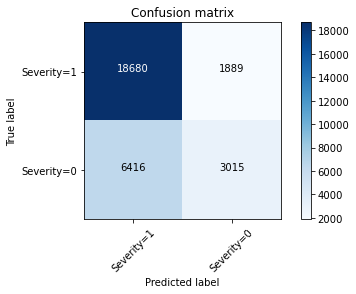

In [50]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Severity=1','Severity=0'],normalize= False,  title='Confusion matrix')

### ROC Curve

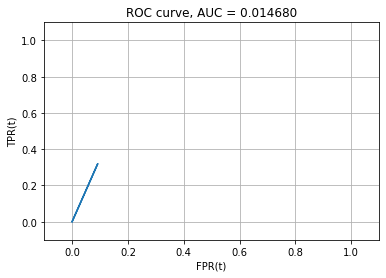

In [51]:
thresholds = np.linspace(1,0,30000)
predict_=predict.reshape(len(predict),1)
T = predict_

Y = y_test

ROC = np.zeros((30000,2))

for i in range(101):
    t = thresholds[i]

    # Classifier / label agree and disagreements for current threshold.
    TP_t = np.logical_and( T > t, Y==1 ).sum()
    TN_t = np.logical_and( T <=t, Y==0 ).sum()
    FP_t = np.logical_and( T > t, Y==0 ).sum()
    FN_t = np.logical_and( T <=t, Y==1 ).sum()

        
    # Compute false positive rate for current threshold.
    FPR_t = FP_t / float(FP_t + TN_t)
    ROC[i,0] = FPR_t

    # Compute true  positive rate for current threshold.
    TPR_t = TP_t / float(TP_t + FN_t)
    ROC[i,1] = TPR_t

# Plot the ROC curve.
#fig = plt.figure(figsize=(10,8))
plt.plot(ROC[:,0], ROC[:,1])
plt.xlim(-0.1,1.1)
plt.ylim(-0.1,1.1)
plt.xlabel('FPR(t)')
plt.ylabel('TPR(t)')
plt.grid()

AUC = 0.
for i in range(100):
    AUC += (ROC[i+1,0]-ROC[i,0]) * (ROC[i+1,1]+ROC[i,1])
AUC *= 0.5

plt.title('ROC curve, AUC = %.6f'%AUC)
plt.show()

In [52]:
#roc_curve(y_test,predict)

### ROC,AUC 

In [53]:
from sklearn.metrics import roc_curve, roc_auc_score,auc

In [54]:
log_roc=roc_auc_score(y_test,predict)
probability=logreg.predict_proba(x_test)[:,1]
fpr,tpr,t=roc_curve(y_test,probability)

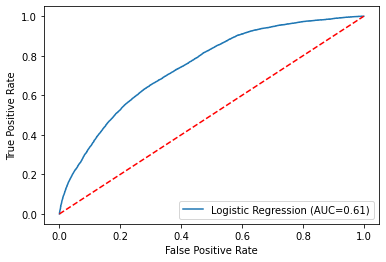

In [55]:
plt.figure()
plt.plot(fpr,tpr,label="Logistic Regression (AUC=%0.2f)"%log_roc)
plt.plot([0,1], [0,1],'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

## SVM

In [56]:
from sklearn.svm import SVC
svm=SVC(kernel='linear')

In [57]:
x_test=x_test.head(10000)
y_test=y_test.head(10000)
x_train_svm,x_test_svm,y_train_svm,y_test_svm=train_test_split(x_test,y_test,test_size=0.3,random_state=42)

In [58]:
start=time.time()
svm.fit(x_train_svm,y_train_svm)
predict_svm=svm.predict(x_test_svm)
print('Accuracy by SVM:',accuracy(predict_svm,y_test_svm),'%')
stop=time.time()
print('Time:',stop-start)

Accuracy by SVM: 73.4 %
Time: 31.740478992462158


### Using PCA

In [59]:
x_test_svm=pca_test[:10000]
y_test_svm=y_test.head(10000)
x_train_svm,x_test_svm,y_train_svm,y_test_svm=train_test_split(x_test,y_test,test_size=0.3,random_state=42)

In [60]:
start=time.time()
svm.fit(x_train_svm,y_train_svm)
predict_test_svm=svm.predict(x_test_svm)
print('Accuracy by SVM:',accuracy(predict_test_svm,y_test_svm),'%')
stop=time.time()
print('Time:',stop-start)

Accuracy by SVM: 73.4 %
Time: 32.01531219482422


In [61]:
confusion_matrix(y_test_svm,predict_svm)

array([[1958,  152],
       [ 646,  244]])

In [62]:
cnf_matrix = confusion_matrix(y_test_svm,predict_svm)

Confusion matrix, without normalization
[[1958  152]
 [ 646  244]]


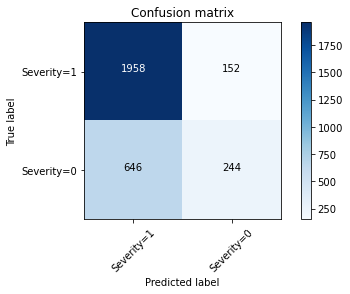

In [63]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Severity=1','Severity=0'],normalize= False,  title='Confusion matrix')

In [64]:
print('F1 Score:',f1_score(y_test_svm,predict_svm,average=None))

F1 Score: [0.83071701 0.37947123]


In [65]:
print(classification_report(y_test_svm,predict_svm))

              precision    recall  f1-score   support

         0.0       0.75      0.93      0.83      2110
         1.0       0.62      0.27      0.38       890

    accuracy                           0.73      3000
   macro avg       0.68      0.60      0.61      3000
weighted avg       0.71      0.73      0.70      3000



In [66]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10)
model.fit(X,y)

RandomForestClassifier(n_estimators=10)

In [67]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(RandomForestClassifier(n_estimators=100))
sel.fit(X,y)
index = sel.get_support()
X_feature = X[X.columns[index]]

In [68]:
x_train,x_test,y_train,y_test=train_test_split(X_feature,y,test_size=0.3,random_state=42)

In [69]:
logreg.fit(x_train,y_train)

LogisticRegression(C=0.1, solver='liblinear')

In [70]:
y_hat = logreg.predict(x_test)

In [71]:
accuracy(y_hat,y_test)

71.22666666666667

In [72]:
#svm.fit(x_train,y_train)

In [73]:
#y_hat = svm.predict(x_test)

In [74]:
#accuracy(y_hat,y_test)

In [134]:
data=new_concat.sample(100000)
data[['Severity']]=labels
X=data.drop('Severity',axis=1)
y=data[['Severity']]

In [135]:
import xgboost

In [136]:
from xgboost import XGBClassifier

In [137]:
from sklearn.datasets import make_classification

In [227]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 200)

In [325]:
model = XGBClassifier(learning_rate = 0.05, max_depth = 6,random_state = 1,n_estimators=10, subsample=1)

In [326]:
model.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=0, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [327]:
y_hat = model.predict(x_test)

In [328]:
accuracy(y_test,y_hat)

72.455

In [318]:
#pd.crosstab(y_test,y_hat)

In [319]:
confusion_matrix(y_test,y_hat)

array([[12580,  1098],
       [ 4411,  1911]])

In [320]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

         0.0       0.74      0.92      0.82     13678
         1.0       0.64      0.30      0.41      6322

    accuracy                           0.72     20000
   macro avg       0.69      0.61      0.61     20000
weighted avg       0.71      0.72      0.69     20000

